## 시계열 데이터 활용한 Simple_RNN##

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

In [3]:
x = np.arange(0,100,0.1)
y = 0.5 * np.sin(2*x) - np.cos(x / 2.0)

In [4]:
print(x.shape, y.shape)

(1000,) (1000,)


In [14]:
seq_data = y.reshape(-1,1)
# (1000,1) shape으로 변경
print(seq_data.shape)
print(len(seq_data))


(1000, 1)
1000


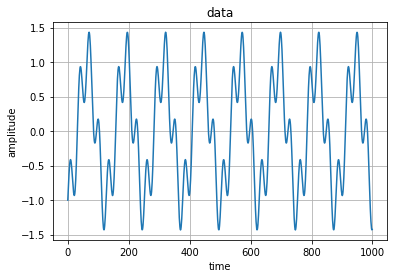

In [10]:
plt.grid()
plt.title("data")
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()


In [12]:
def seq2dataset(seq, window, horizon):
    X = []
    Y = []
    #0~999
    #0~ 20
    #1~21
    #979~ 999
    #980 ~ 1000
    # 총 980번 반복하는 이유 : 20개를 window size로 하여, 뒤의 980개를 정답데이터로 하기 때문
    for i in range(len(seq) - (window+horizon) + 1):
        x = seq[i:(i+window)]
        y = (seq[i+window+horizon-1])
        
        X.append(x)
        Y.append(y)
    #3차원으로 return
    return np.array(X), np.array(Y)

In [13]:
#window size
w = 20
#horizon factor
h = 1
# X는 x_train_data, Y는 y_train_data( answer )
X, Y = seq2dataset(seq_data, w, h)
print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [16]:
from sklearn.model_selection import train_test_split
# 이를 이용하여 train, test를 split


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size =0.8, random_state = 1234)


In [26]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


# 모델 생성

In [27]:
model = Sequential()

# Layer 추가 - RNN

In [28]:
model.add(SimpleRNN(units=128, activation='tanh', input_shape = x_train[0].shape))
model.add(Dense(1))


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 128)               16640     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss = 'mse', optimizer='adam', metrics=['mae'])
# mae는 오차의 절댓값
hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 0.0027 - mae: 0.0356 - val_loss: 3.1317e-04 - val_mae: 0.0152
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 5.1942e-04 - mae: 0.0186 - val_loss: 8.8413e-05 - val_mae: 0.0075
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 1.1150e-04 - mae: 0.0084 - val_loss: 3.3392e-05 - val_mae: 0.0048
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 3.2534e-05 - mae: 0.0045 - val_loss: 3.2764e-05 - val_mae: 0.0047
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 2.6552e-05 - mae: 0.0042 - val_loss: 1.5021e-05 - val_mae: 0.0031
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 1.8017e-05 - mae: 0.0034 - val_loss: 1.2597e-05 - val_mae: 0.0028
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2799e-05 - mae: 0.0028 - val_loss: 8.6820e-06 - val_mae: 0.0023
Epoch 8/100
25/25 [===========

25/25 [==============================] - 0s 4ms/step - loss: 1.5873e-06 - mae: 9.8863e-04 - val_loss: 2.1945e-06 - val_mae: 0.0012
Epoch 60/100
25/25 [==============================] - 0s 5ms/step - loss: 1.9600e-06 - mae: 0.0011 - val_loss: 5.1794e-06 - val_mae: 0.0018
Epoch 61/100
25/25 [==============================] - 0s 4ms/step - loss: 4.5831e-06 - mae: 0.0017 - val_loss: 3.3339e-06 - val_mae: 0.0015
Epoch 62/100
25/25 [==============================] - 0s 4ms/step - loss: 2.0041e-06 - mae: 0.0012 - val_loss: 1.4159e-06 - val_mae: 9.4270e-04
Epoch 63/100
25/25 [==============================] - 0s 4ms/step - loss: 1.5401e-06 - mae: 9.7648e-04 - val_loss: 2.3070e-06 - val_mae: 0.0013
Epoch 64/100
25/25 [==============================] - 0s 4ms/step - loss: 2.0058e-06 - mae: 0.0011 - val_loss: 4.8304e-06 - val_mae: 0.0018
Epoch 65/100
25/25 [==============================] - 0s 4ms/step - loss: 5.0656e-06 - mae: 0.0018 - val_loss: 1.5530e-06 - val_mae: 0.0011
Epoch 66/100
25/25 [=

In [55]:
pred = model.predict(x_test)
print(pred.shape)

(196, 1)


In [56]:
pred


array([[ 0.75482935],
       [-0.4410652 ],
       [ 0.7236897 ],
       [-0.5038659 ],
       [ 0.5971434 ],
       [-0.6751977 ],
       [ 0.02290019],
       [-1.0963405 ],
       [ 0.51025546],
       [-1.3531407 ],
       [-0.07397529],
       [ 1.2977501 ],
       [-1.4304694 ],
       [-0.74704885],
       [ 0.8511648 ],
       [-0.96422434],
       [ 0.0459315 ],
       [-0.88817155],
       [ 0.41662103],
       [-0.83036387],
       [ 0.5872051 ],
       [-1.3567204 ],
       [-0.11369172],
       [-0.00967459],
       [-0.17291832],
       [ 0.9278787 ],
       [-0.92428136],
       [-1.1575348 ],
       [-1.2439427 ],
       [-0.53410524],
       [ 0.42601043],
       [ 0.54760176],
       [-1.4206679 ],
       [-1.2946141 ],
       [-0.47411257],
       [ 0.75566304],
       [-0.6692628 ],
       [ 0.21777682],
       [-0.5395457 ],
       [ 0.8083415 ],
       [-1.4008797 ],
       [-1.1277679 ],
       [-0.1288716 ],
       [-0.5063288 ],
       [ 0.42677128],
       [ 0

In [57]:
# 0~ len(y_test)까지 정수 중 5개를 랜덤으로 추출 
rand_idx = np.random.randint(0,len(y_test), size=5)

In [58]:
rand_idx.shape

(5,)

In [59]:
rand_idx

array([118, 114,  98, 165,  24])

In [60]:
print('pred = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

pred =  [ 0.4337019  -0.17259261 -0.43065816 -0.87814915 -0.17291832]
label =  [ 0.43209991 -0.1738005  -0.43017063 -0.87701247 -0.17419854]


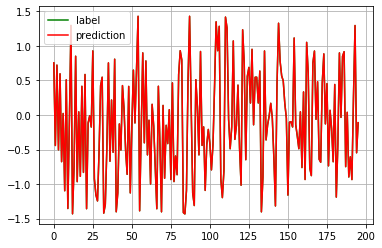

In [61]:

plt.plot(y_test, label='label', color='green')
plt.plot(pred, label = 'prediction', color = 'red')
plt.grid()
plt.legend(loc='best')

plt.show()


# 기존에 포함되지 않았던 x값(100~150)으로 학습데이터를 만들어 Prediction

In [62]:
new_x = np.arange(100,150,0.1)
new_y = 0.5 * np.sin(2 * new_x) - np.cos(new_x / 2.0)
print(new_x.shape, new_y.shape)

(500,) (500,)


In [63]:
new_y = new_y.reshape(-1,1)
print(new_y.shape)

(500, 1)


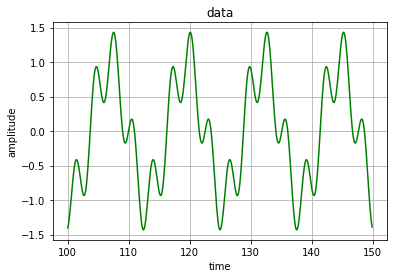

In [64]:
plt.grid()
plt.title("data")
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(new_x,new_y, color='green')

plt.show()

# new_X에는 각 원소들이 20 길이의 시계열 데이터로 구성되어있음

# new_Y에는 new_X에서 같은 인덱스에 있는 원소 "다음"번에 올 원소가 '정답'으로서 들어감

In [65]:
new_X, new_Y = seq2dataset(new_y, 20, 1)
print(new_X.shape, new_Y.shape)

(480, 20, 1) (480, 1)


## 각 20개의 시계열 데이터로 그 다음에 올 수를 Prediction

In [66]:
new_pred = model.predict(new_X)
print(new_pred.shape)

(480, 1)


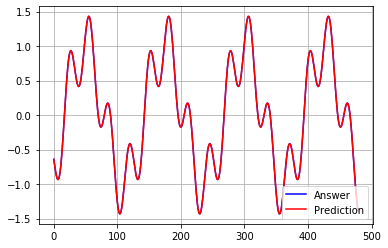

In [67]:
plt.grid()
plt.plot( new_Y, color='blue', label='Answer')
plt.plot( new_pred, color='red', label='Prediction')
plt.legend()
plt.show()

# Conclusion : 원래의 함수값과 Prediction값이 거의 동일하게 겹쳐지는 것을 볼 수 있다.